# Exercises 3

*Antti Härkönen*

## 1.

a)

The cyclical nature of the graph would mean that each node in the circle is both descendant and parent of itself,
and that causation happens in effect to both directions along the graph, and this contradicts the definition
of a directed graph.

b)

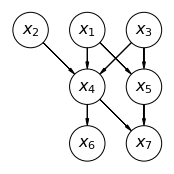

In [1]:
import daft
from matplotlib import rc

rc("font", family="serif", size=16)
scale = 1.25
pgm = daft.PGM()

pgm.add_node('x1', '$x_1$', 2, 3, scale=scale)
pgm.add_node('x2', '$x_2$', 1, 3, scale=scale)
pgm.add_node('x3', '$x_3$', 3, 3, scale=scale)
pgm.add_node('x4', '$x_4$', 2, 2, scale=scale)
pgm.add_node('x5', '$x_5$', 3, 2, scale=scale)
pgm.add_node('x6', '$x_6$', 2, 1, scale=scale)
pgm.add_node('x7', '$x_7$', 3, 1, scale=scale)

pgm.add_edge('x1', 'x4', directed=True)
pgm.add_edge('x2', 'x4', directed=True)
pgm.add_edge('x3', 'x4', directed=True)
pgm.add_edge('x1', 'x5', directed=True)
pgm.add_edge('x3', 'x5', directed=True)
pgm.add_edge('x4', 'x6', directed=True)
pgm.add_edge('x4', 'x7', directed=True)
pgm.add_edge('x5', 'x7', directed=True)

pgm.render()

## 2.


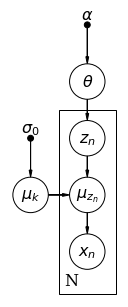

In [2]:
import daft
from matplotlib import rc

rc("font", family="serif", size=16)
scale = 1.25
pgm = daft.PGM()

pgm.add_node('alpha', r'$\alpha$', 3, 5, fixed=True, scale=scale)
pgm.add_node('theta', r'$\theta$', 3, 4, scale=scale)
pgm.add_node('sigma', r'$\sigma_0$', 2, 3, fixed=True, scale=scale)
pgm.add_node('mu_k', r'$\mu_k$', 2, 2, scale=scale)
pgm.add_node('z', r'$z_n$', 3, 3, scale=scale)
pgm.add_node('mu', r'$\mu_{z_n}$', 3, 2, scale=scale)
pgm.add_node('x', r'$x_n$', 3, 1, scale=scale)

pgm.add_edge('alpha', 'theta', directed=True)
pgm.add_edge('theta', 'z', directed=True)
pgm.add_edge('z', 'mu', directed=True)
pgm.add_edge('sigma', 'mu_k', directed=True)
pgm.add_edge('mu_k', 'mu', directed=True)
pgm.add_edge('mu', 'x', directed=True)

pgm.add_plate([2.5, 0.25, 1, 3.25], 'N')

pgm.render()

$ p(\alpha, \theta, \sigma_0, \mu_k, z_n, \mu_{z_n}, x_n) $
$ = p(\alpha)p(\theta | \alpha)p(\sigma_0)p(\mu_k | \sigma_0) \prod\limits^{N}_{n=1}[p(z_n | \theta)p(\mu_{z_n} | z_n, \mu_k)p(x_n | \mu_{z_n})] $

## 3.

Prior: $ p(\beta) = Gamma(\beta|a,b) = \frac{1}{\Gamma(a)} b^a \beta^{a-1} e^{-b \beta} \propto $
$ \beta^{a-1} e^{-b \beta} $

Likelihood: $ p(X|\beta) \propto $
$ \beta^{\frac{n}{2}} e^{-\frac{\beta}{2} \sum\limits_{i=1}^{n} (x_i - \mu)^2} $

Posterior: $ p(\beta | X) \propto p(\beta) p(X|\beta) = $
$ \beta^{a-1} e^{-b \beta} \beta^{\frac{n}{2}} e^{-\frac{\beta}{2} \sum\limits_{i=1}^{n} (x_i - \mu)^2} = $
$ \beta^{a-1 + \frac{n}{2}} e^{-b \beta - \frac{\beta}{2} \sum\limits_{i=1}^{n} (x_i - \mu)^2} $
$ \propto \frac{1}{\Gamma(a + \frac{n}{2})} ({b+\frac12\sum\limits_{i=1}^{n} (x_i - \mu)^2})^{a + \frac{n}{2}} \beta^{a + \frac{n}{2} -1} e^{(b+\frac12\sum\limits_{i=1}^{n} (x_i - \mu)^2) \beta} $
$ = Gamma(\beta | a_{new}, b_{new}) $, where $a_{new} = a + \frac{n}2$ and $b_{new} = b+\frac12\sum\limits_{i=1}^{n} (x_i - \mu)^2$.

## 4.

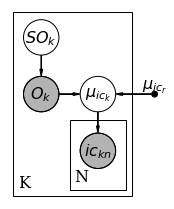

In [3]:
import daft
from matplotlib import rc

rc("font", family="serif", size=16)
scale = 1.25
pgm = daft.PGM()

pgm.add_node('mean_income', r'$\mu_{ic_{k}}$', 2, 2, scale=scale)
pgm.add_node('religion_income', r'$\mu_{ic_{r}}$', 3, 2, scale=scale, fixed=True)
pgm.add_node('real_income', r'$ic_{kn}$', 2, 1, scale=scale, observed=True)
pgm.add_node('orthodox', r'$O_{k}$', 1, 2, scale=scale, observed=True)
pgm.add_node('segregation', r'$SO_{k}$', 1, 3, scale=scale)
# pgm.add_node('alpha', r'$\alpha$', 0, 3, scale=scale, fixed=True)
# pgm.add_node('beta', r'$\beta$', 1, 4, scale=scale, fixed=True)
# pgm.add_node('mu_mu', r'$\mu_{\mu}$', 3, 2, scale=scale, fixed=True)
# pgm.add_node('sigma_mu', r'$\sigma_{\mu}$', 3, 3, scale=scale, fixed=True)

# pgm.add_edge('mu_mu', 'mean_income', directed=True)
# pgm.add_edge('sigma_mu', 'mean_income', directed=True)
# pgm.add_edge('alpha', 'segregation', directed=True)
# pgm.add_edge('beta', 'segregation', directed=True)
pgm.add_edge('mean_income', 'real_income', directed=True)
pgm.add_edge('religion_income', 'mean_income', directed=True)
pgm.add_edge('segregation', 'orthodox', directed=True)
pgm.add_edge('orthodox', 'mean_income', directed=True)

pgm.add_plate([0.5, 0.2, 2.1, 3.25], 'K')
pgm.add_plate([1.5, 0.3, 1, 1.25], 'N')

pgm.render()

$\mu_{ic_{k}} = $ mean income in location k, $ \mu_{ic_{k}} \sim LogNormal(\mu_k, \sigma_k) $

$\mu_{ic_{r}} = $ mean income by majority religion, $ \mu_{ic_{r}} \sim LogNormal(\mu_r, \sigma_r) $

$ic_{kn} = $ income of person n in location k, $ ic_{kn} \sim Exp((\mu_{ic_{r}})^{-1}) $

$O_{k} = $ the proportion of Russian Orthodox population in location k, $ O_{k} \sim Beta(\alpha_O, \beta_O) $

$SO_{k} = $ the proportion of Russian Orthodox population in location k without income differences,
$ SO_{k} \sim Beta(\alpha_{SO}, \beta_{SO}) $

$K = $ locations

$N = $ people in a location

